# Sección nueva
**PROYECTO FINAL MICHEL ARIAS ROJAS**

En este proyecto descargamos un dataset de Kaggle con las credenciales habilitadas desde mi usuario, seleccionamos de la lista el dataset de valores de precios del oro /content/gold-prices-for-5-years-financial-predictions.zip e inicamos realizando prediccion del valor de apertura del oro con base en los datos de valor medio, valor de cierre y cantidad de oro dispoble como variables de mayor peso.

In [1]:
api_token = {"username":"michelpavaluosadn","key":"b32d6b568eeddb48603f8e48e8b4dbb2"}

In [2]:
!rm -rf /root/.kaggle.

In [3]:
!mkdir /root/.kaggle/

In [4]:
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [5]:
!kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned     Students Performance | Clean Dataset                10KB  2024-10-29 19:32:26           4900         89  1.0              
ironwolf437/laptop-price-dataset                             Laptop Price - dataset‏                             25KB  2024-11-12 15:50:44           1078         28  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset       11KB  2024-09-28 20:21:12          26131        516  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercis

In [13]:
!kaggle datasets download -d kusumakar/gold-prices-for-5-years-financial-predictions

Dataset URL: https://www.kaggle.com/datasets/kusumakar/gold-prices-for-5-years-financial-predictions
License(s): apache-2.0
  0% 0.00/23.8k [00:00<?, ?B/s]
100% 23.8k/23.8k [00:00<00:00, 28.3MB/s]


In [14]:
import zipfile

archivo_zip = '/content/gold-prices-for-5-years-financial-predictions.zip'

with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
    for nombre_archivo in zip_file.namelist():
        print(nombre_archivo)

Gold  Prices.csv


In [42]:
import zipfile
import pandas as pd

# Define la ruta al archivo zip
archivo_zip = '/content/gold-prices-for-5-years-financial-predictions.zip'  # Asegúrate de que esta sea la ruta correcta al archivo zip

# Extrae el archivo Prices.csv del archivo zip si aún no se ha extraído
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extract('Gold  Prices.csv', path='/content/')  # Extrae a la carpeta '/content/'

# Lee el archivo Prices.csv en un DataFrame de pandas
data = pd.read_csv('/content/Gold  Prices.csv')  # Ahora el archivo debería existir en esta ubicación

# Muestra las primeras filas del DataFrame
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2019-11-11 00:00:00-05:00,137.610001,137.789993,136.440002,137.059998,7037300,0.0,0.0,0.0
1,2019-11-12 00:00:00-05:00,137.029999,137.589996,136.190002,137.429993,6448600,0.0,0.0,0.0
2,2019-11-13 00:00:00-05:00,137.800003,138.220001,137.639999,137.979996,8776000,0.0,0.0,0.0
3,2019-11-14 00:00:00-05:00,138.389999,138.940002,137.869995,138.559998,5220500,0.0,0.0,0.0
4,2019-11-15 00:00:00-05:00,138.029999,138.419998,137.970001,138.210007,10106700,0.0,0.0,0.0


CREACION DE UNA RED NEURONAL PARA TRABAJAR CON EL ARCHIVO DESCARGADO DE KAGGLE

In [79]:
#IMPORTAMOS LIBRERIAS

!pip install tensorflow

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [51]:
# 1. Cargar y preparar los datos
# Corrección: Ruta del archivo actualizada
data = pd.read_csv('/content/Gold  Prices.csv')

print(data.columns) # Imprimir todas las columnas

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Capital Gains'],
      dtype='object')


visualizacion de datos

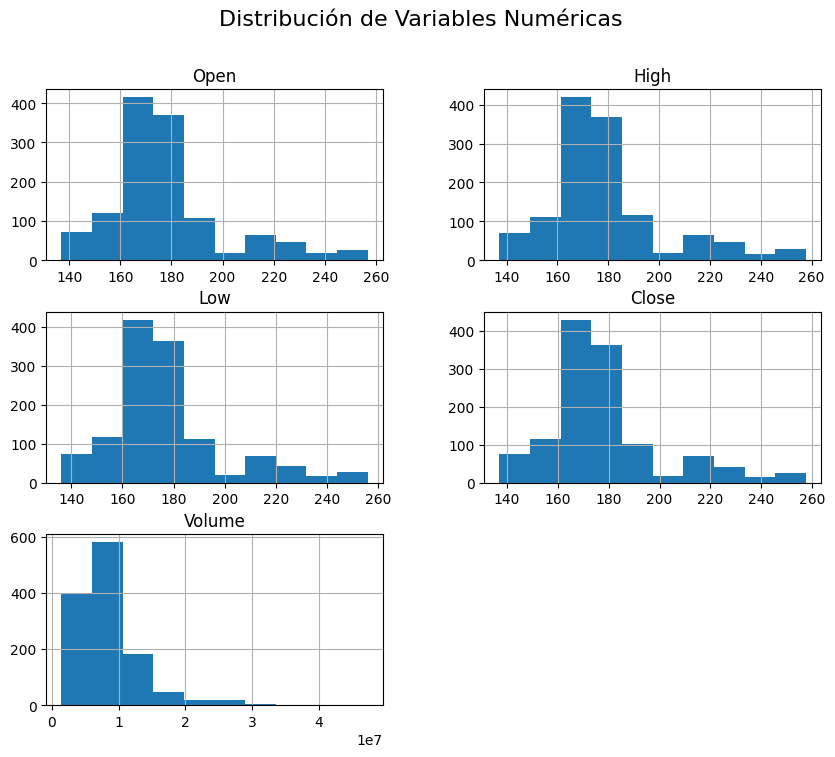

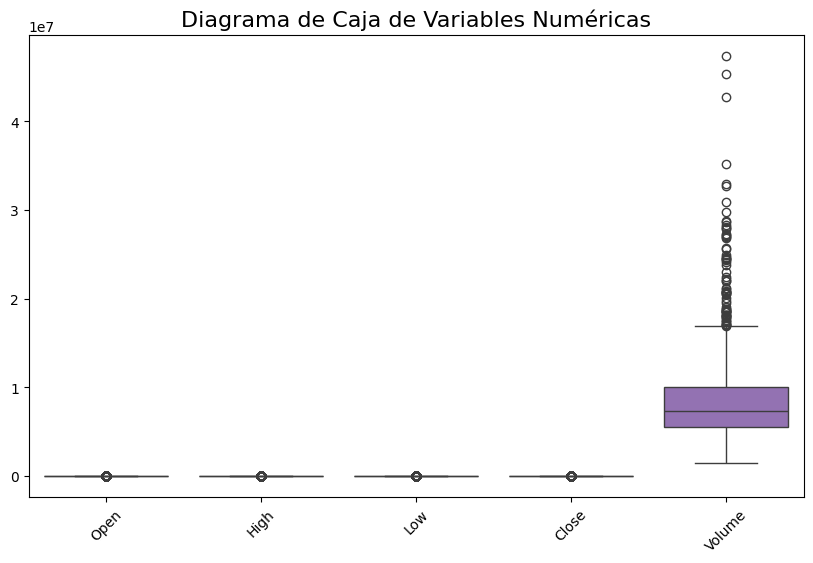

              Open         High          Low        Close        Volume
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean    177.982234   178.766224   177.144762   177.986478  8.605847e+06
std      22.490130    22.575668    22.377607    22.503454  4.859634e+06
min     136.979996   137.210007   136.119995   137.009995  1.436500e+06
25%     165.432499   166.215004   164.814999   165.419998  5.556475e+06
50%     173.750000   174.460007   172.864998   173.750000  7.326000e+06
75%     183.747501   184.417500   182.785004   183.669998  1.008325e+07
max     256.760010   257.709991   255.910004   257.500000  4.734770e+07


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la descripción estadística de las variables numéricas
numeric_features = ['Open', 'High', 'Low', 'Close', 'Volume']  # Ajusta según las columnas numéricas en tu dataset
numeric_data = data[numeric_features]
description = numeric_data.describe()

# Visualizar la descripción estadística

# 1. Histograma para la distribución de cada variable:
numeric_data.hist(figsize=(10, 8))
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.show()

# 2. Diagrama de caja para comparar la distribución de cada variable:
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data)
plt.title('Diagrama de Caja de Variables Numéricas', fontsize=16)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.show()

# 3. Imprimir la tabla de descripción estadística:
print(description)

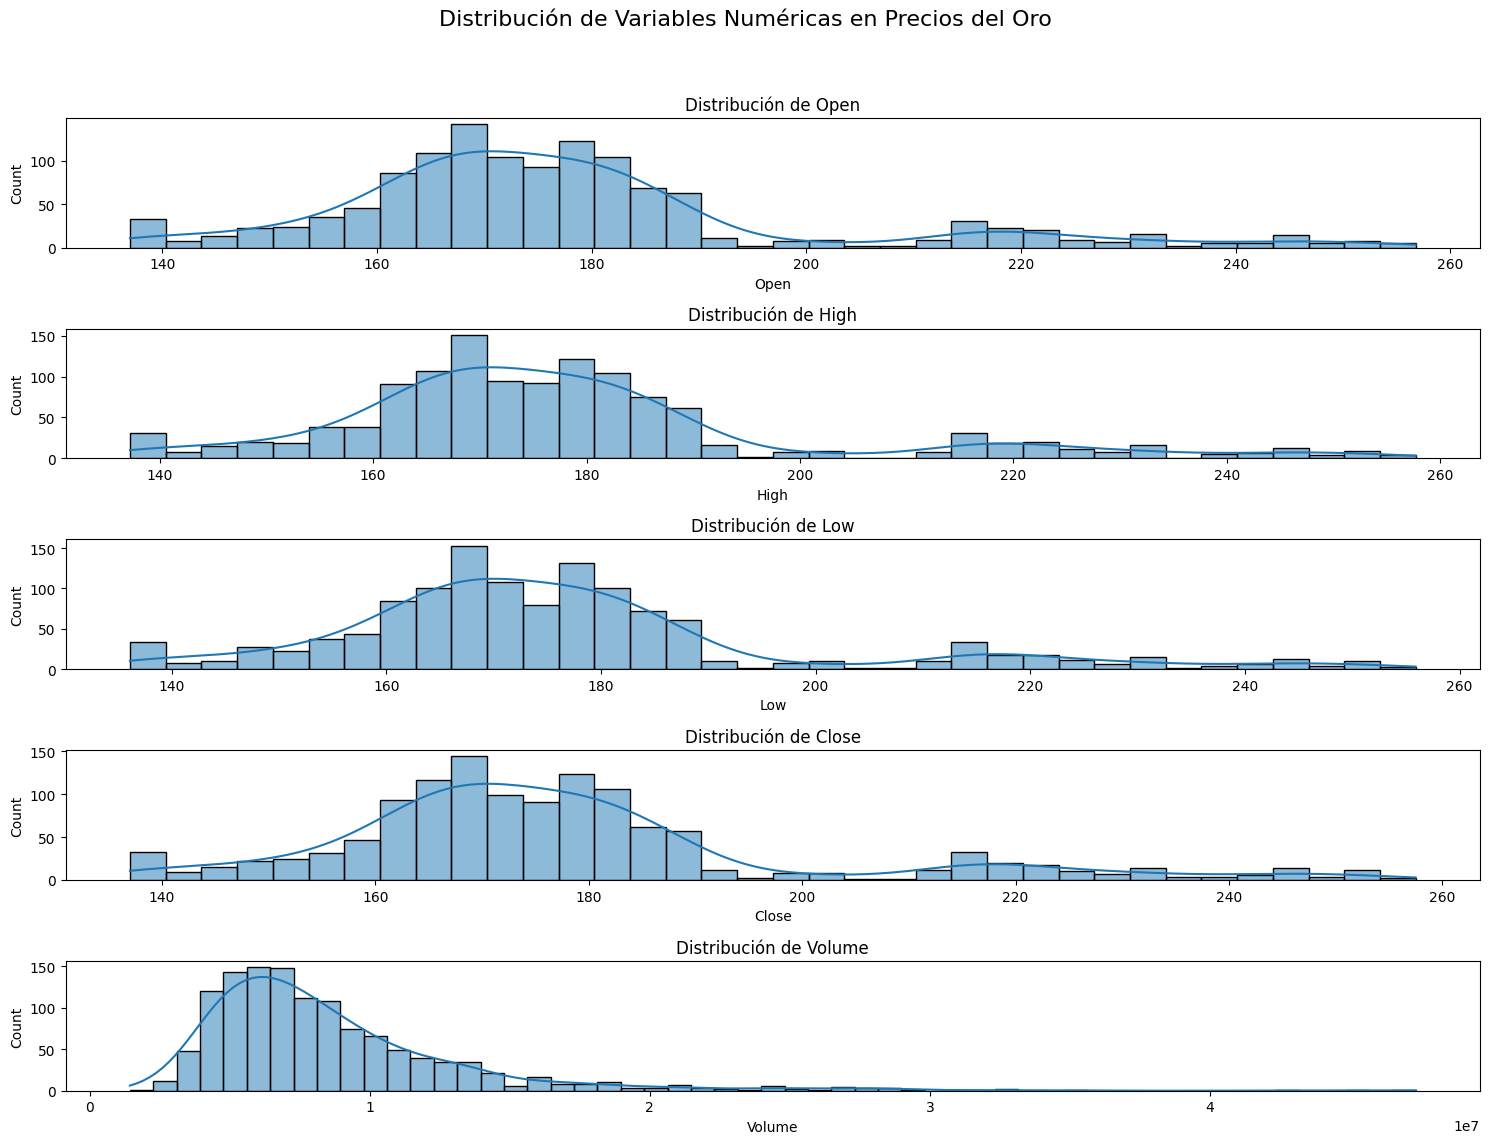

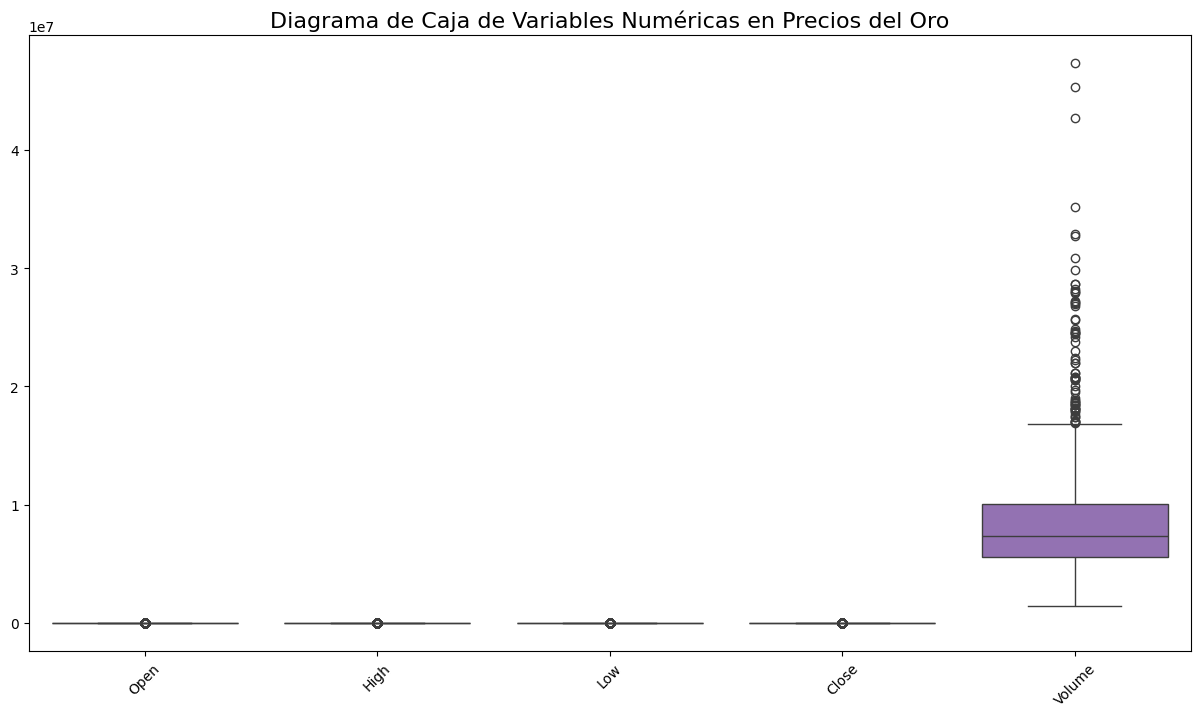

              Open         High          Low        Close        Volume
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean    177.982234   178.766224   177.144762   177.986478  8.605847e+06
std      22.490130    22.575668    22.377607    22.503454  4.859634e+06
min     136.979996   137.210007   136.119995   137.009995  1.436500e+06
25%     165.432499   166.215004   164.814999   165.419998  5.556475e+06
50%     173.750000   174.460007   172.864998   173.750000  7.326000e+06
75%     183.747501   184.417500   182.785004   183.669998  1.008325e+07
max     256.760010   257.709991   255.910004   257.500000  4.734770e+07


In [62]:
# Seleccionar las columnas numéricas del dataset de oro
numeric_features = ['Open', 'High', 'Low', 'Close', 'Volume']  # Ajusta según las columnas en tu dataset
numeric_data = data[numeric_features]

# Obtener la descripción estadística
description = numeric_data.describe()

# Visualizar la descripción estadística

# 1. Histogramas
# Usar sns.histplot en lugar de numeric_data.hist para poder usar kde
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(15, 12)) # create subplots
for i, col in enumerate(numeric_features):
    sns.histplot(numeric_data[col], ax=axes[i], kde=True) # use sns.histplot with kde
    axes[i].set_title(f'Distribución de {col}')

plt.suptitle('Distribución de Variables Numéricas en Precios del Oro', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar el espacio para el título
plt.show()

# 2. Diagrama de caja
plt.figure(figsize=(15, 8))  # Ajusta figsize según tus necesidades
sns.boxplot(data=numeric_data)
plt.title('Diagrama de Caja de Variables Numéricas en Precios del Oro', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# 3. Tabla de descripción
print(description)

Calculo de la Matriz de correlacion

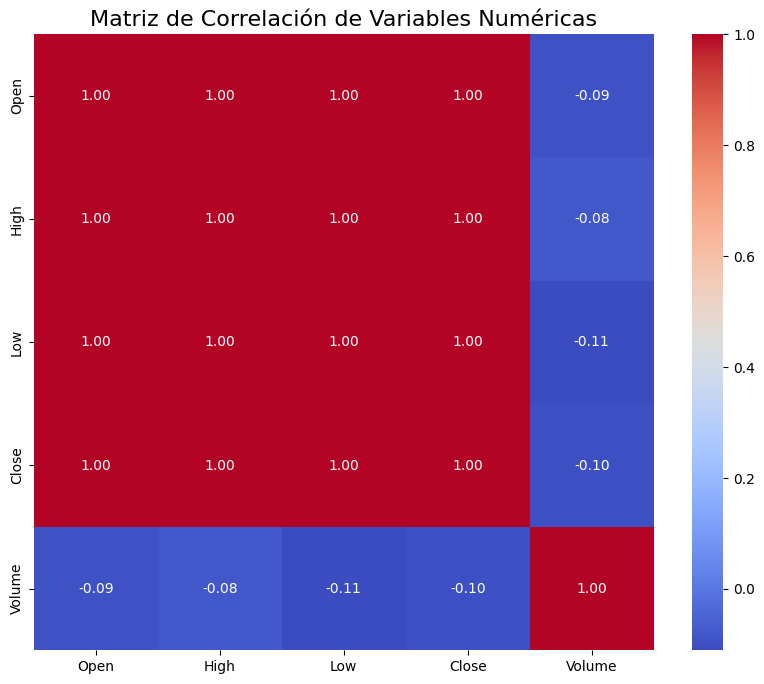

            Open      High       Low     Close    Volume
Open    1.000000  0.999473  0.999334  0.998779 -0.094791
High    0.999473  1.000000  0.999232  0.999433 -0.083908
Low     0.999334  0.999232  1.000000  0.999500 -0.110670
Close   0.998779  0.999433  0.999500  1.000000 -0.098528
Volume -0.094791 -0.083908 -0.110670 -0.098528  1.000000


In [63]:

numeric_features = ['Open', 'High', 'Low', 'Close', 'Volume']
numeric_data = data[numeric_features]

# Calcular la matriz de correlación
matriz_correlacion = numeric_data.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.show()

# Imprimir la matriz de correlación
print(matriz_correlacion)

Se alcula la matriz de correlación: Se calcula la matriz de correlación usando numeric_data.corr().
Se encuentra las variables con alta correlación: Se establece un umbral de correlación (por ejemplo, 0.8) y se busca en la matriz las variables que tienen una correlación absoluta por encima de ese umbral, excluyendo la correlación de una variable consigo misma. Las variables correlacionadas se almacenan en una lista.
Visualizacion de la distribución:
Histogramas: Para cada par de variables correlacionadas, se crean dos histogramas (uno para cada variable) usando sns.histplot con estimación de densidad del kernel (kde=True).
Diagramas de caja: Para cada par de variables correlacionadas, se crea un diagrama de caja usando sns.boxplot para comparar sus distribuciones.

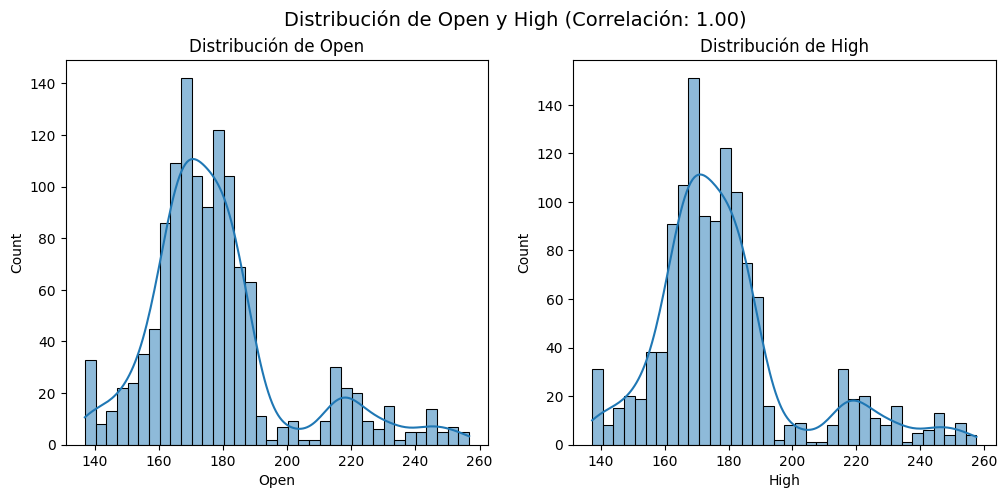

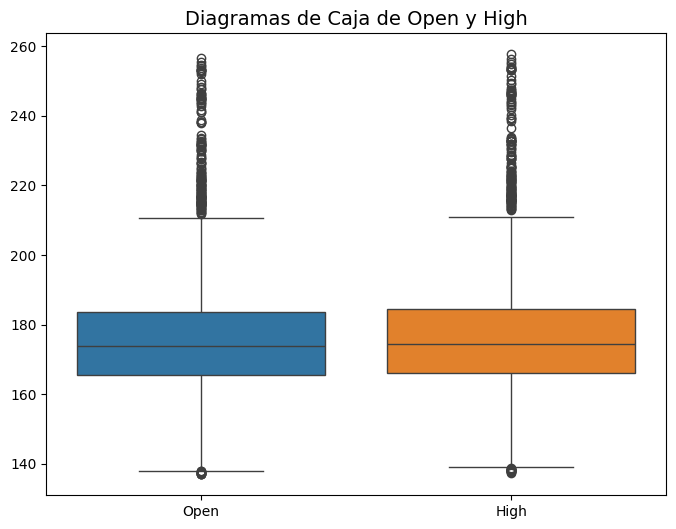

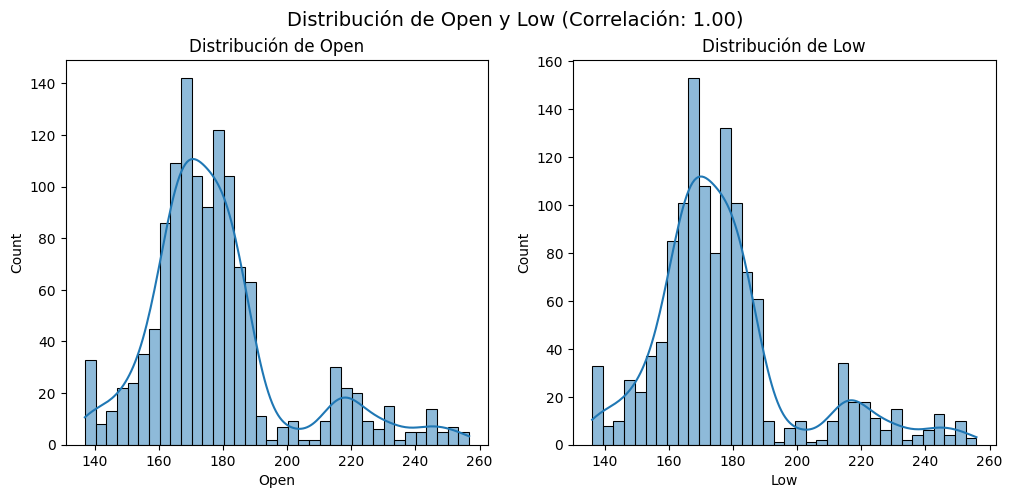

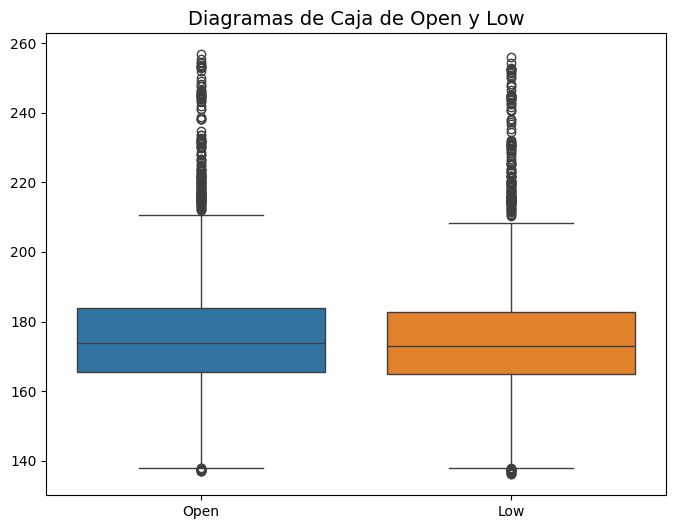

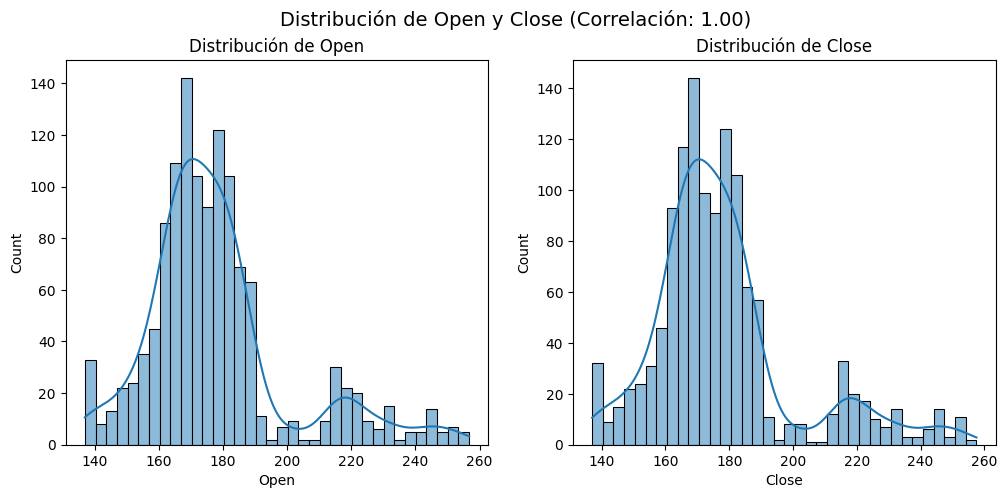

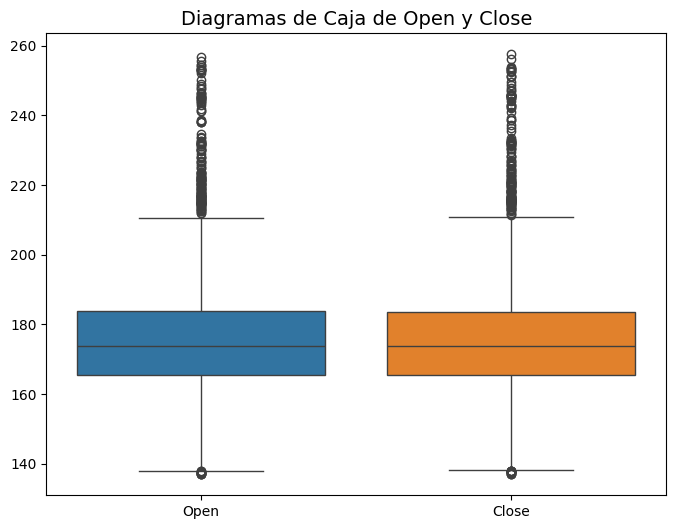

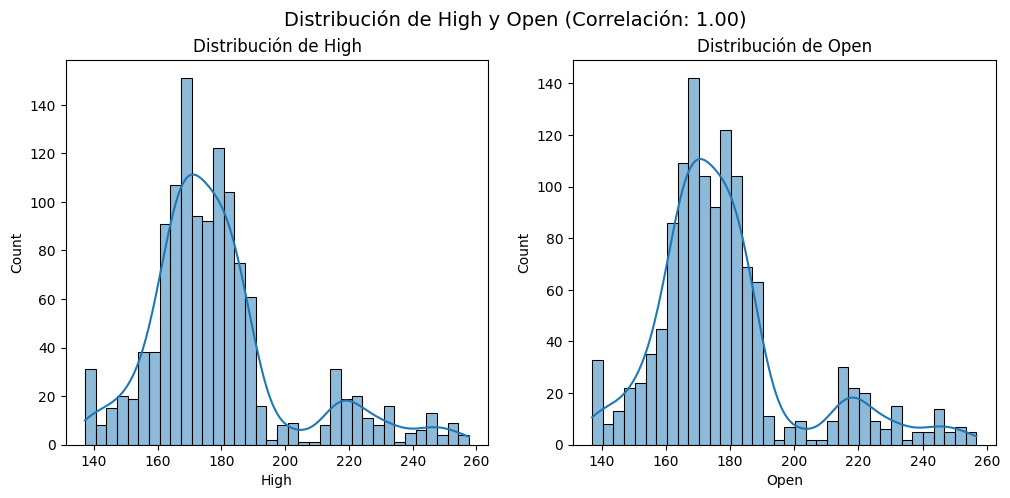

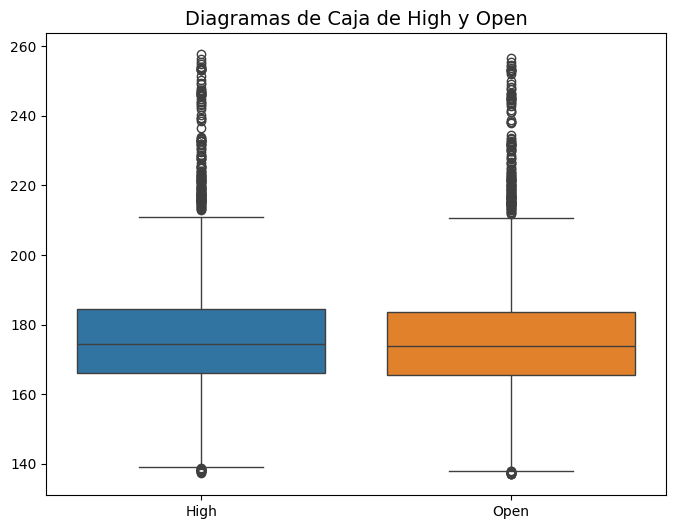

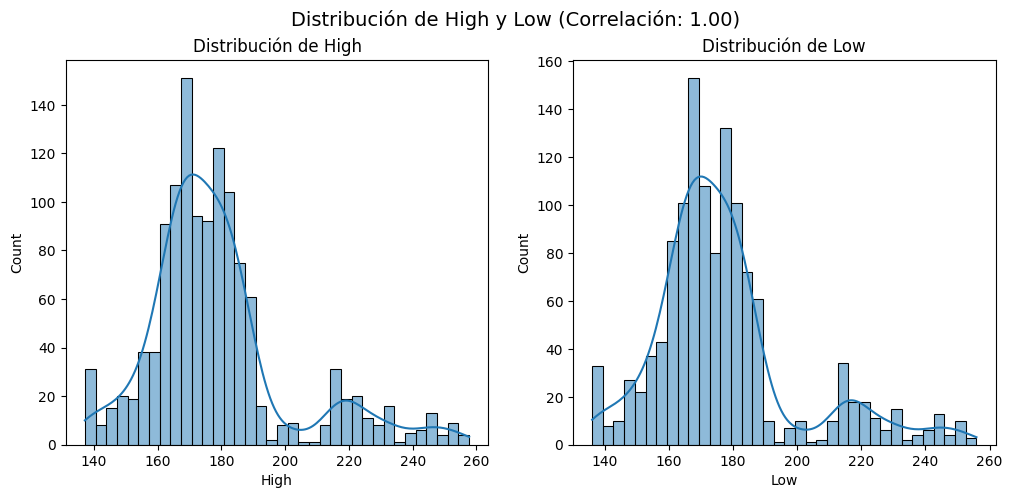

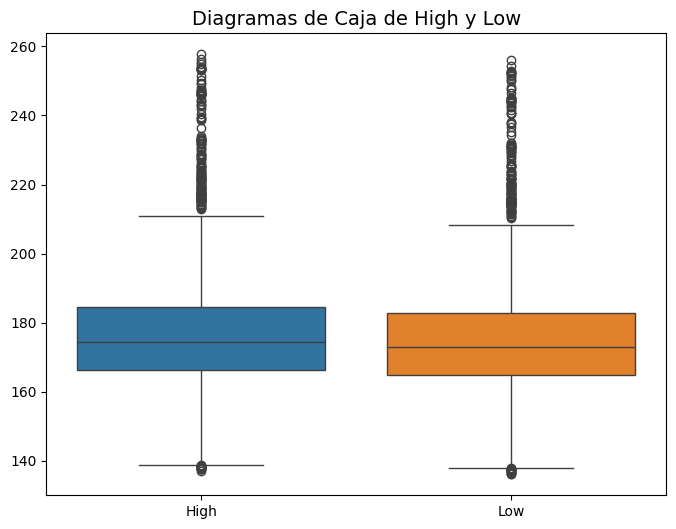

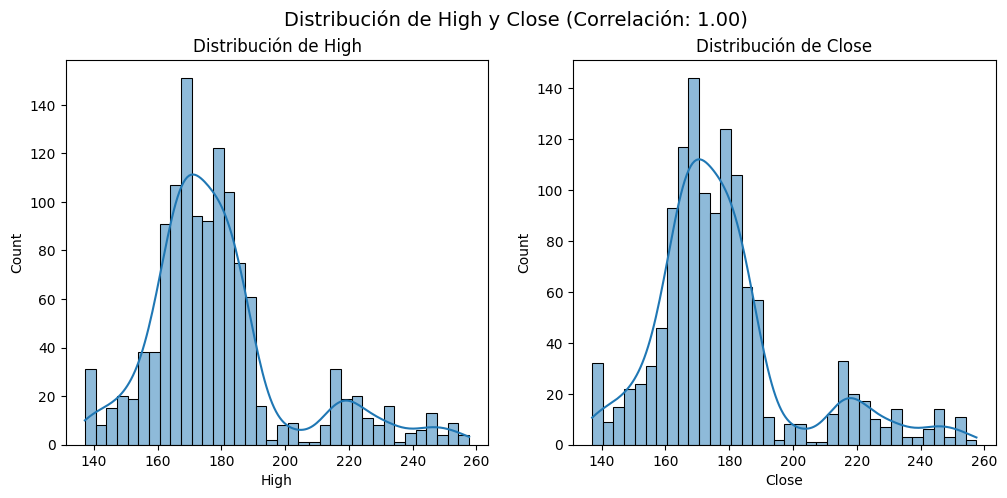

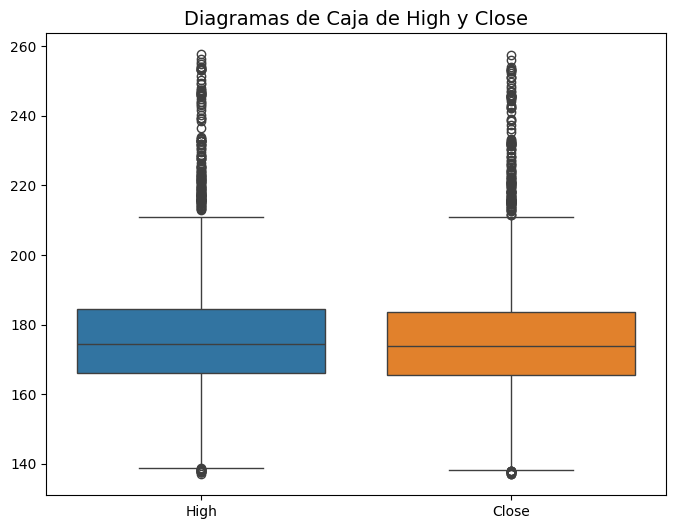

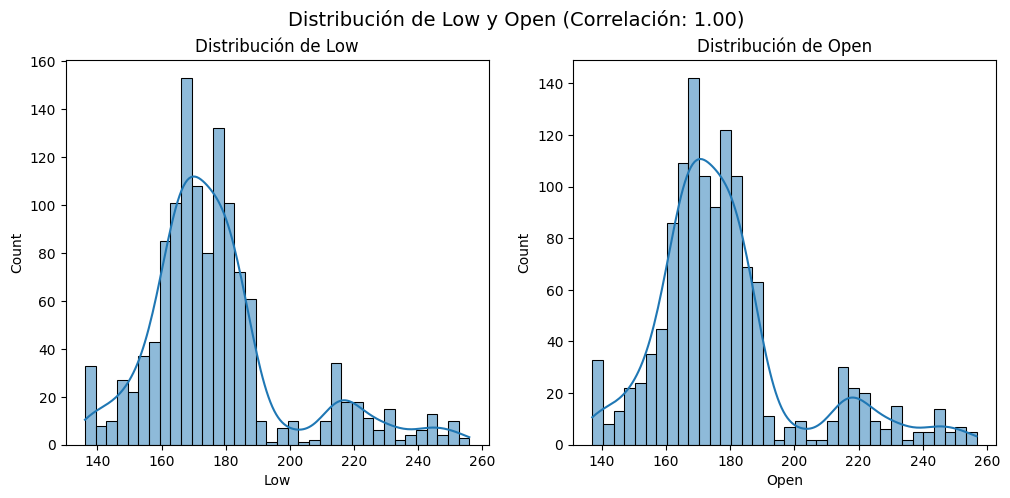

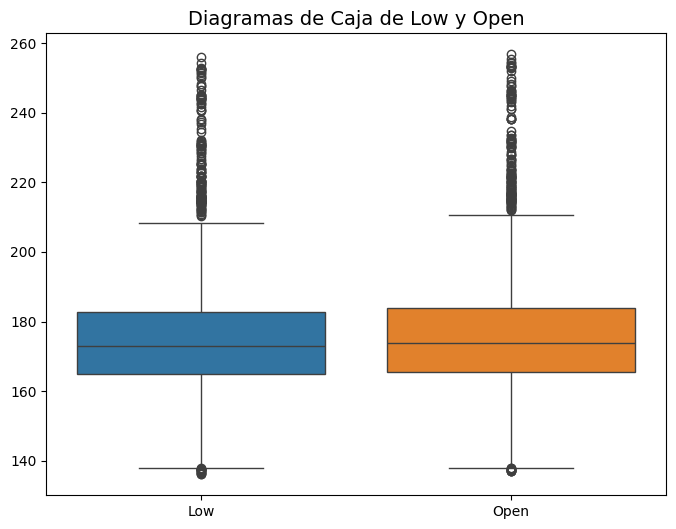

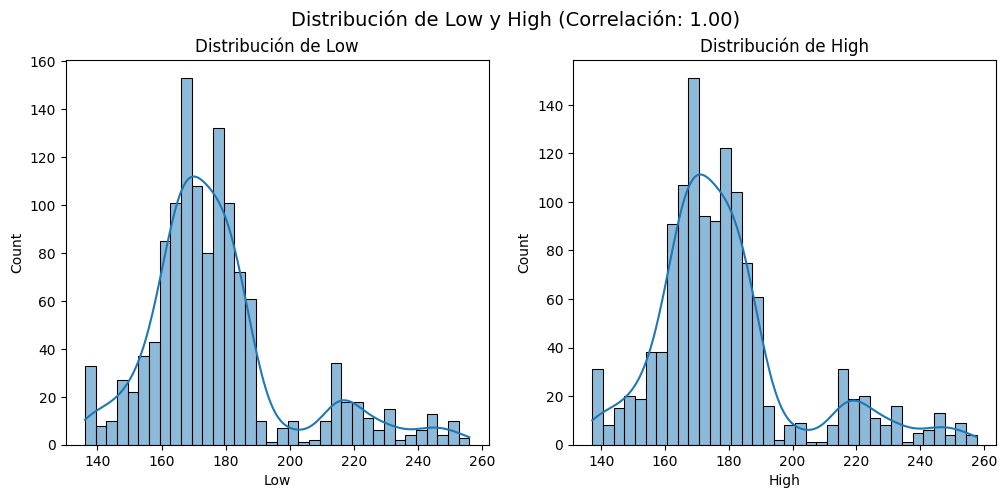

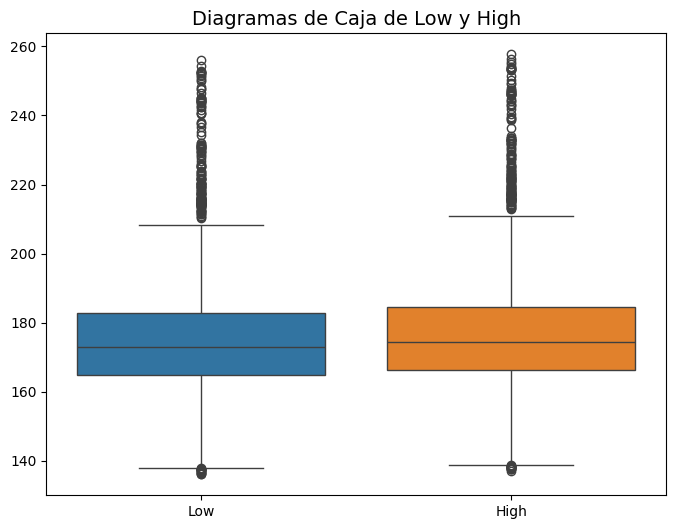

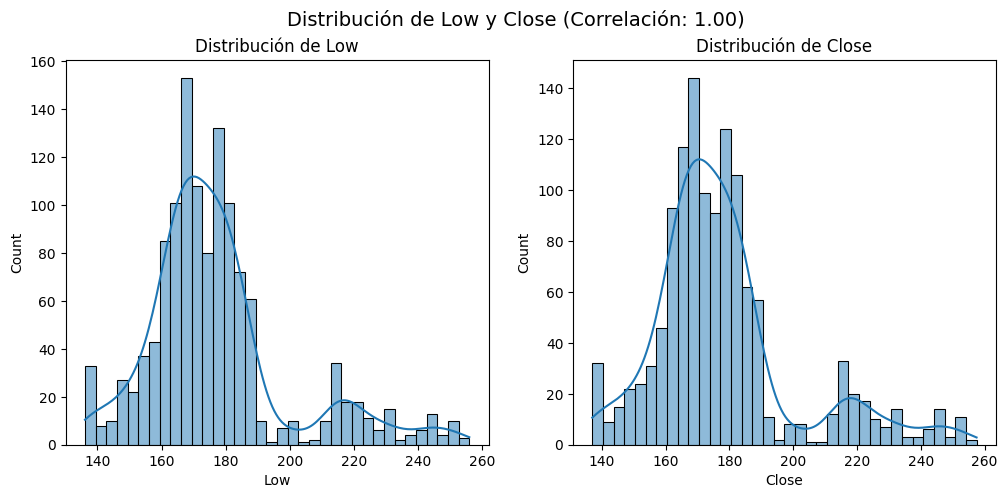

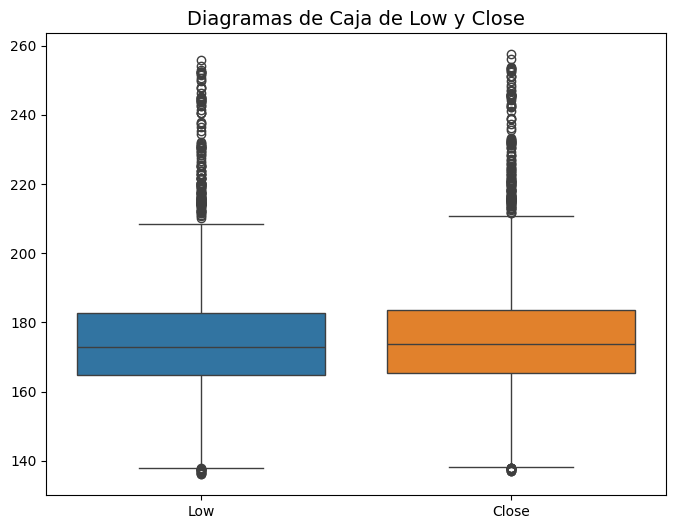

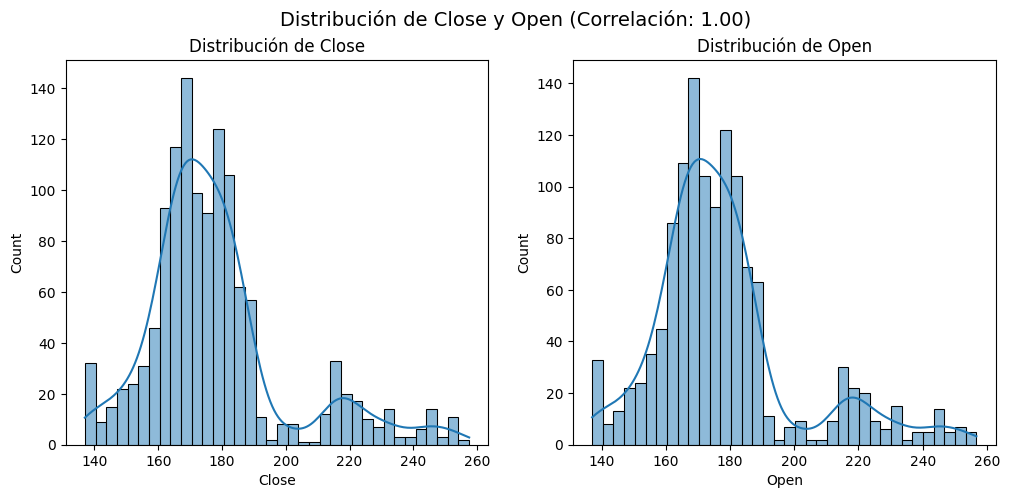

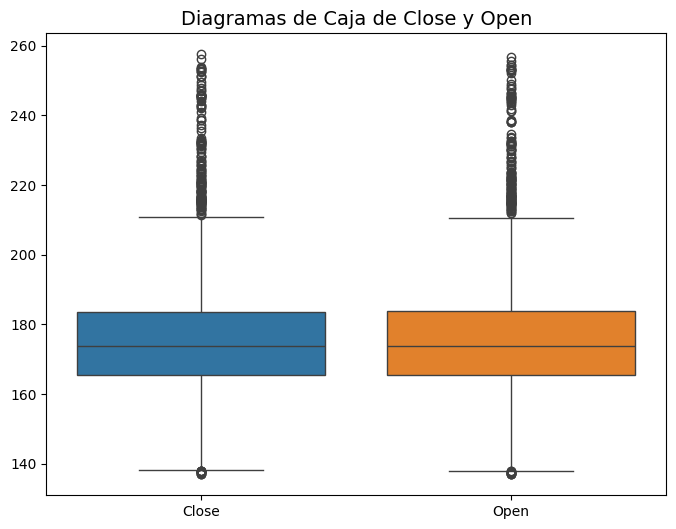

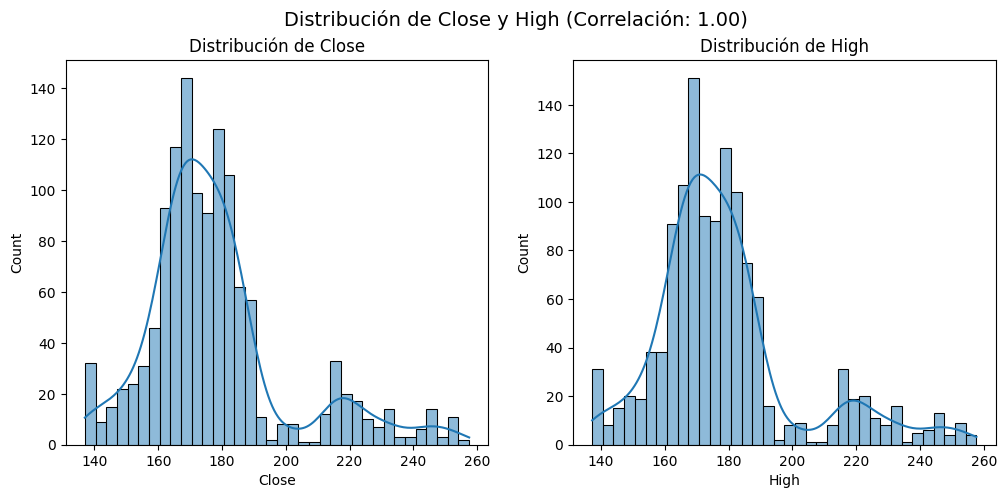

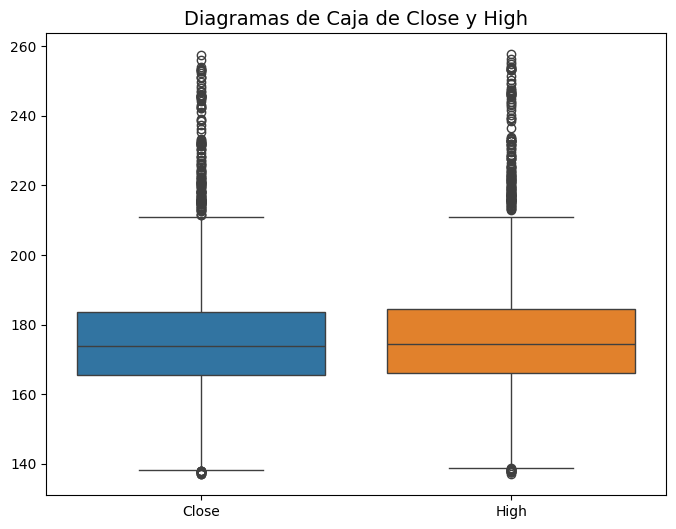

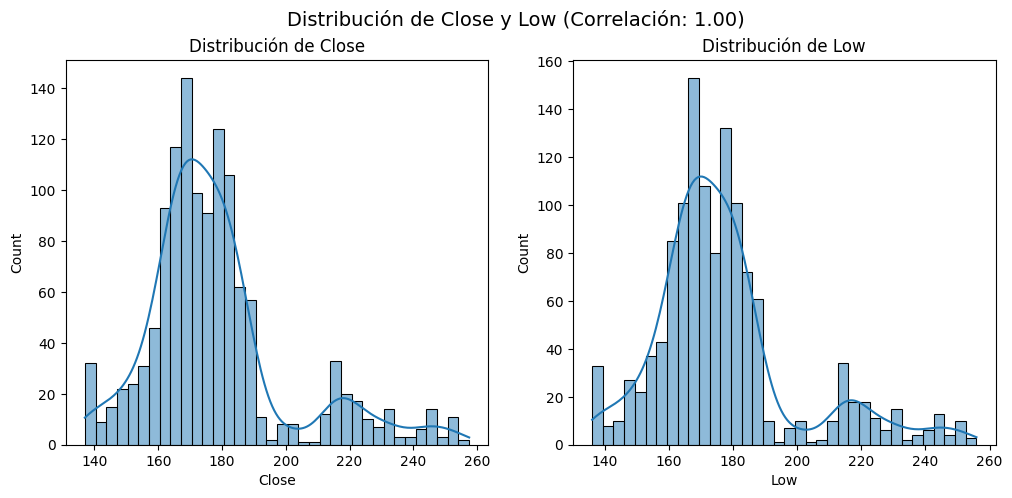

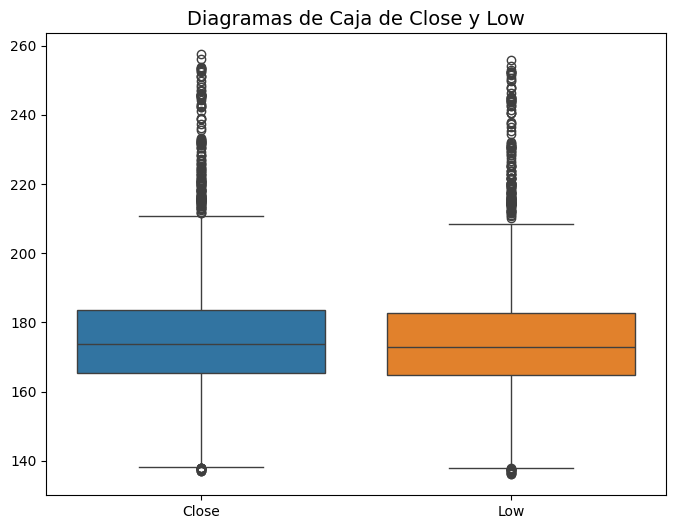

In [67]:
numeric_features = ['Open', 'High', 'Low', 'Close', 'Volume']
numeric_data = data[numeric_features]

# Calcular la matriz de correlación
matriz_correlacion = numeric_data.corr()

# Encontrar las variables con mayor correlación (excluyendo la correlación consigo misma)
umbral_correlacion = 0.8  # Ajusta este valor según tu criterio
variables_correlacionadas = []
for col in matriz_correlacion.columns:
    for index in matriz_correlacion.index:
        if col != index and abs(matriz_correlacion.loc[index, col]) > umbral_correlacion:
            variables_correlacionadas.append((col, index))

# Visualizar la distribución de las variables correlacionadas
for col1, col2 in variables_correlacionadas:
    # 1. Histogramas
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(numeric_data[col1], ax=axes[0], kde=True)
    axes[0].set_title(f'Distribución de {col1}')
    sns.histplot(numeric_data[col2], ax=axes[1], kde=True)
    axes[1].set_title(f'Distribución de {col2}')
    plt.suptitle(f'Distribución de {col1} y {col2} (Correlación: {matriz_correlacion.loc[col1, col2]:.2f})', fontsize=14)
    plt.show()

    # 2. Diagramas de caja
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=numeric_data[[col1, col2]])
    plt.title(f'Diagramas de Caja de {col1} y {col2}', fontsize=14)
    plt.show()

# **Realizamos el modelo**



**Objetivo:**

El código tiene como objetivo crear y entrenar un modelo de red neuronal para predecir el precio de apertura ("Open") del oro, basándose en otras características como el precio alto ("High"), precio bajo ("Low"), precio de cierre ("Close") y volumen de operaciones ("Volume").

**Pasos del código:**

Seleccionar características y variable objetivo:

features = ['Open', 'High', 'Low', 'Close', 'Volume']: Define una lista con los nombres de las columnas que se usarán como características de entrada para el modelo.
target = 'Open': Define la columna que se usará como variable objetivo (lo que el modelo intentará predecir), que en este caso es el precio de apertura ("Open").
X = data[features]: Crea un DataFrame X que contiene solo las columnas de características.
y = data[target]: Crea una Serie y que contiene solo la columna de la variable objetivo.
Dividir los datos en conjuntos de entrenamiento y prueba:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%).
test_size=0.2: Indica que el 20% de los datos se usarán para pruebas.
random_state=42: Asegura que la división sea reproducible (se obtendrá la misma división cada vez que se ejecute el código).

**Escalar los datos:**

scaler = MinMaxScaler(): Crea un objeto MinMaxScaler para escalar los datos.
X_train = scaler.fit_transform(X_train): Ajusta el escalador a los datos de entrenamiento y luego los transforma.
X_test = scaler.transform(X_test): Transforma los datos de prueba usando el escalador ajustado a los datos de entrenamiento.
¿Por qué escalar? Escalar los datos ayuda a que el modelo de red neuronal converja más rápido y a evitar que las características con rangos más amplios dominen el entrenamiento.
Crear el modelo de red neuronal:

model = tf.keras.models.Sequential([...]): Crea un modelo de red neuronal secuencial.
tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)): Define la capa de entrada con 64 neuronas, activación ReLU y la forma de entrada que coincide con el número de características.
tf.keras.layers.Dense(32, activation='relu'): Define una capa oculta con 32 neuronas y activación ReLU.
tf.keras.layers.Dense(1): Define la capa de salida con 1 neurona, ya que estamos prediciendo un valor numérico (regresión).

**Compilar el modelo:**

model.compile(optimizer='adam', loss='mse', metrics=['mae']): Compila el modelo, especificando:
optimizer='adam': El optimizador que se usará para ajustar los pesos del modelo. Adam es un optimizador popular y eficiente.
loss='mse': La función de pérdida que se usará para medir el error del modelo. MSE (Error Cuadrático Medio) es una función de pérdida común para problemas de regresión.
metrics=['mae']: Las métricas que se usarán para evaluar el rendimiento del modelo. MAE (Error Absoluto Medio) es una métrica común para problemas de regresión.
En resumen, este código crea un modelo de red neuronal simple para predecir el precio de apertura del oro. Prepara los datos, los escala, define la arquitectura del modelo, y lo compila para que esté listo para ser entrenado. El siguiente paso sería entrenar el modelo usando model.fit(X_train, y_train, epochs=..., batch_size=...). Espero que esto te ayude a entender mejor el código!

In [78]:
# Selecciona las características y la variable objetivo
# Asumiendo que 'Price' es la variable objetivo
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Open'

X = data[features]
y = data[target]

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escala los datos usando MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Capa de entrada con 64 neuronas y activación ReLU
    tf.keras.layers.Dense(32, activation='relu'), # Capa oculta con 32 neuronas y activación ReLU
    tf.keras.layers.Dense(1) # Capa de salida con 1 neurona (para regresión)
])

# 3. Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Optimizador Adam, función de pérdida MSE, métrica MAE

# 4. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Calcular R² para entrenamiento y validación en cada época
train_r2 = []
val_r2 = []
for i in range(len(history.history['loss'])):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)  # Usar X_test para validación, no X_train
    train_r2.append(r2_score(y_train, y_train_pred))
    val_r2.append(r2_score(y_test, y_val_pred)) # Usar y_test para validación, no y_train

# 5. Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, MAE: {mae}")
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0) # verbose=0 para evitar la salida detallada
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# 6. Hacer predicciones
predictions = model.predict(X_test)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 31875.6289 - mae: 177.0649 - val_loss: 32550.2207 - val_mae: 179.0822
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32082.1426 - mae: 177.6804 - val_loss: 32183.7695 - val_mae: 178.0883
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31410.6074 - mae: 175.8799 - val_loss: 31363.8125 - val_mae: 175.8456
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30473.2539 - mae: 173.3125 - val_loss: 29785.3359 - val_mae: 171.4419
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28675.1250 - mae: 168.1598 - val_loss: 27129.9922 - val_mae: 163.7607
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25905.7285 - mae: 159.9898 - val_loss: 23215.7402 - val_mae: 151.6948
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21707.8398 - mae: 146.6136 - val_loss: 18204.7266 - val_mae: 134.5827
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16596.5898 - mae: 128.4941 - val_loss: 12709.8369 

Guardamos el Modelo

In [76]:
model.save('modelo_red_neuronal.h5')

Calculo de Metricas

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


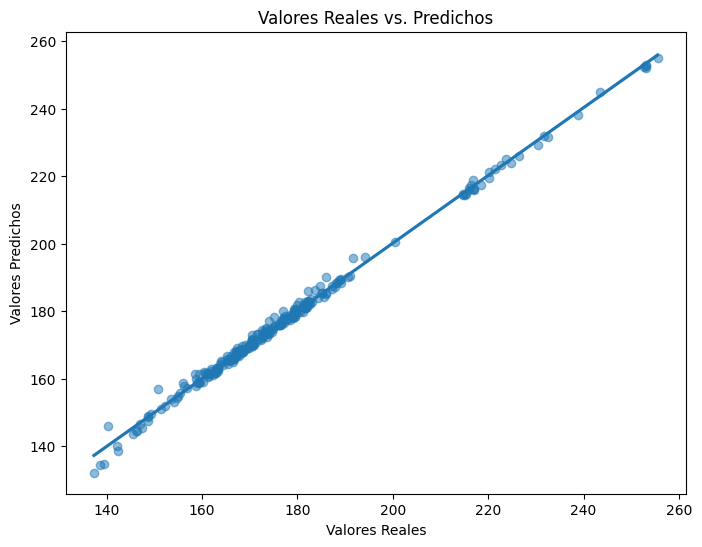

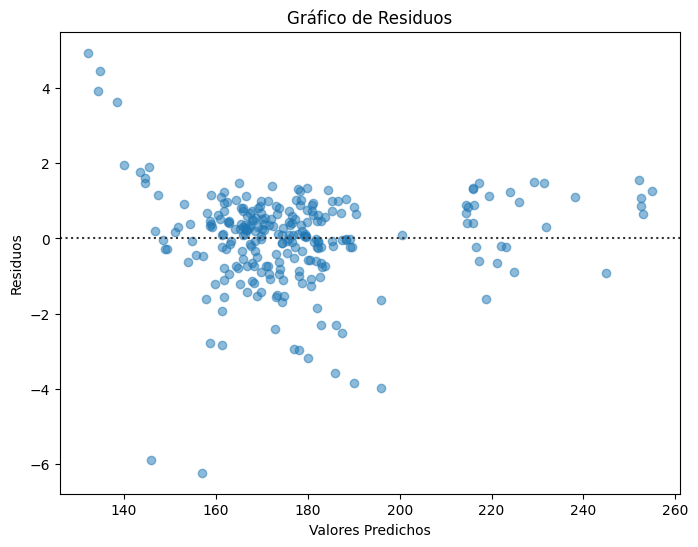

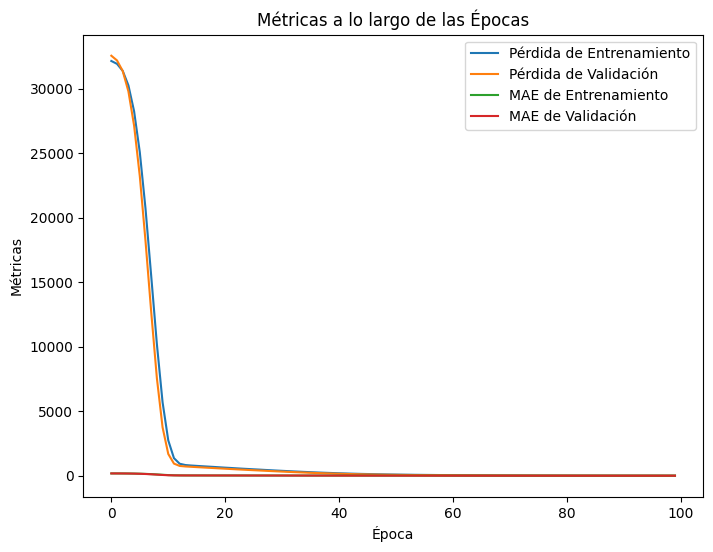

In [84]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir y_pred a 1D array
y_pred = y_pred.flatten() # or y_pred = y_pred.ravel()

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Obtener el intercepto (puede variar según el modelo)
intercepto = model.layers[0].get_weights()[1][0]  # Asumiendo una capa Dense como primera capa

# Obtener los coeficientes (pendientes) - puede variar según la arquitectura del modelo
pendientes = model.layers[0].get_weights()[0][:,0] #  Asumiendo una capa Dense como primera capa


# 1. Valores Reales vs. Predichos
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})  # Usamos regplot para la línea de regresión
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Predichos")
plt.show()

# 2. Gráfico de Residuos
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, scatter_kws={'alpha':0.5})
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.show()

# 3. Métricas a lo largo de las Épocas
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.plot(history.history['mae'], label='MAE de Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de Validación')
plt.xlabel("Época")
plt.ylabel("Métricas")
plt.title("Métricas a lo largo de las Épocas")
plt.legend()
plt.show()

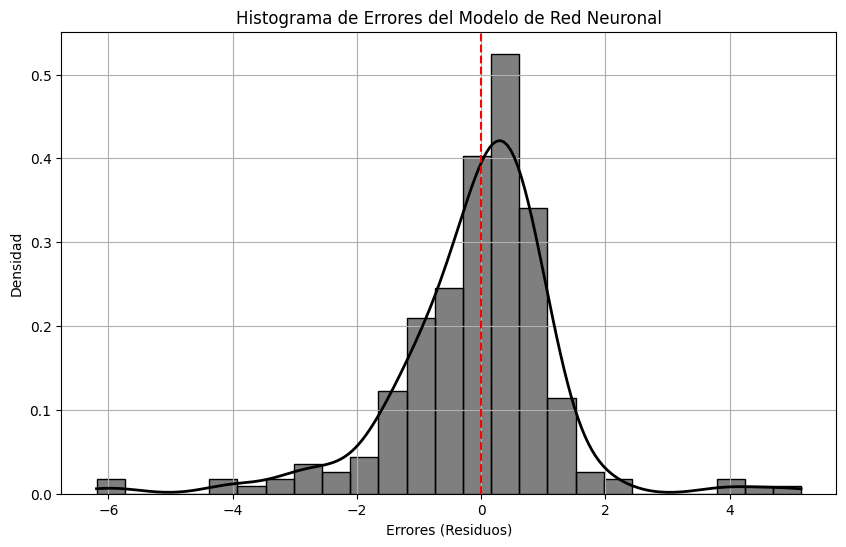

In [92]:
errores = y_test - y_pred.flatten()  # Convertimos y_pred a 1D si es necesario

#
# Graficar el histograma de errores
plt.figure(figsize=(10, 6))
sns.histplot(errores, bins=25, kde=True, color='black', stat='density', line_kws={'color': 'blue', 'linewidth': 2})  # Cambiamos el color de la línea a 'blue'
plt.title('Histograma de Errores del Modelo de Red Neuronal')
plt.xlabel('Errores (Residuos)')
plt.ylabel('Densidad')
plt.axvline(0, color='red', linestyle='--')  # Línea vertical en 0
plt.grid(True)  # Agregamos la cuadrícula

# Ajustar los límites del eje y (opcional)
# plt.ylim(0, 0.2)  # Ajusta los valores según tus datos

plt.show()

Evaluamos el Modelo

In [77]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3729601800441742
Test accuracy: 0.44849783182144165


In [55]:
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,493 (29.27 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,996 (19.52 KB)

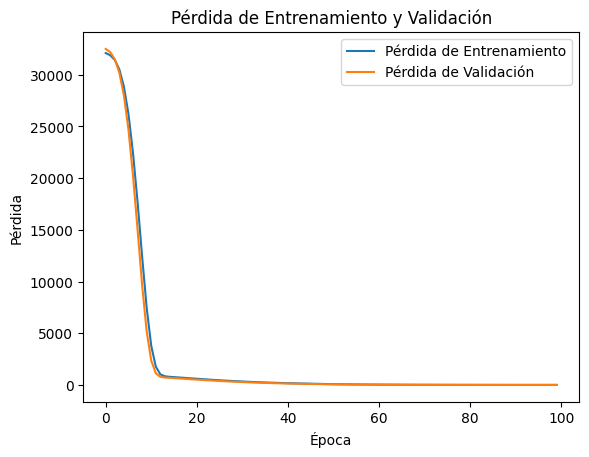

In [56]:
import matplotlib.pyplot as plt

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

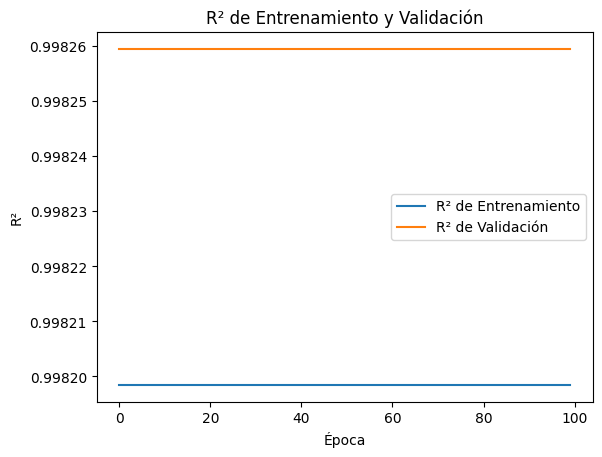

In [57]:
# Graficar R² de entrenamiento y validación
plt.plot(train_r2, label='R² de Entrenamiento')
plt.plot(val_r2, label='R² de Validación')
plt.title('R² de Entrenamiento y Validación')
plt.xlabel('Época')
plt.ylabel('R²')
plt.legend()
plt.show()


Realizamos un grafico de dispersion

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


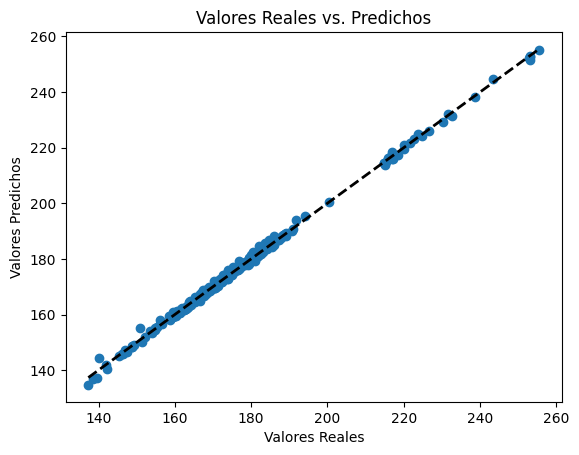

In [58]:
#Hacer predicciones
predictions = model.predict(X_test)

# Graficar valores reales vs. predichos
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea diagonal
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos')
plt.show()

# **Modelo de Red Neuronal Profunda**

In [96]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Open'

X = data[features]
y = data[target]

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escala los datos usando MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Crear el modelo de red neuronal profunda
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Capa de entrada con 128 neuronas
    tf.keras.layers.Dense(64, activation='relu'),  # Capa oculta 1 con 64 neuronas
    tf.keras.layers.Dense(32, activation='relu'),  # Capa oculta 2 con 32 neuronas
    tf.keras.layers.Dense(16, activation='relu'), # Capa oculta 3 con 16 neuronas
    tf.keras.layers.Dense(1) # Capa de salida con 1 neurona (para regresión)
])

# 3. Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 4. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 5. Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, MAE: {mae}")

# 6. Hacer predicciones
y_pred = model.predict(X_test)

# 7. Calcular métricas adicionales
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R²: {r2}")

# Definir un umbral de tolerancia (por ejemplo, 5 unidades)
umbral = 5

# Calcular la proporción de predicciones dentro del umbral
accuracy_regresion = np.mean(np.abs(y_test - y_pred.flatten()) <= umbral)

print(f"Accuracy de regresión (umbral = {umbral}): {accuracy_regresion:.2f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 32795.5703 - mae: 179.6675 - val_loss: 31852.4688 - val_mae: 177.2007
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30412.5312 - mae: 173.0512 - val_loss: 26684.2402 - val_mae: 162.4699
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22516.4727 - mae: 148.7184 - val_loss: 6873.7983 - val_mae: 82.6008
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3517.5300 - mae: 52.8037 - val_loss: 1050.7634 - val_mae: 22.9794
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 984.9557 - mae: 23.9667 - val_loss: 630.2607 - val_mae: 20.6026
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 642.3798 - mae: 19.8106 - val_loss: 500.7155 - val_mae: 18.4007
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 533.4356 - mae: 18.6938 - val_loss: 385.6533 - val_mae: 16.1062
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 396.5391 - mae: 16.3495 - val_loss: 287.3848 - val_mae: 13.8755
Epoch 9/1

# Calculo de metricas

Loss (MSE): 0.2962914705276489
MAE: 0.40206897258758545
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE: 0.296291460624955
RMSE: 0.5443266120859378
R²: 0.999368628578236
MAPE: 0.23%


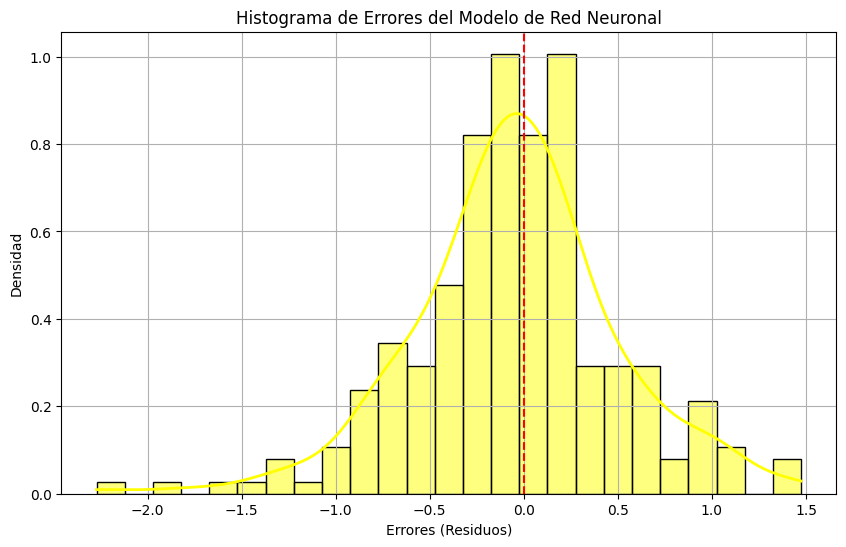

In [94]:
# 5. Evaluar el modelo y calcular métricas
loss, mae = model.evaluate(X_test, y_test, verbose=0)  # verbose=0 para evitar la salida detallada
print(f"Loss (MSE): {loss}")
print(f"MAE: {mae}")

y_pred = model.predict(X_test)

# Calcular MSE, RMSE, R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100  # Flatten y_pred si es necesario
print(f"MAPE: {mape:.2f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy de regresión (umbral = 5): 1.00


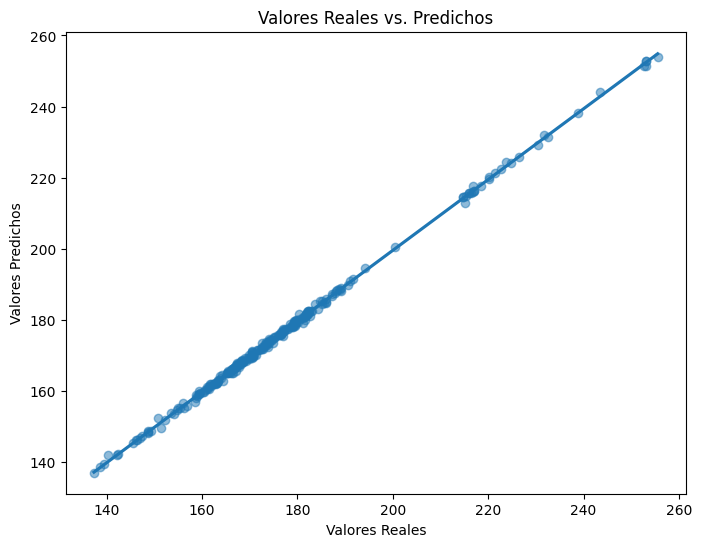

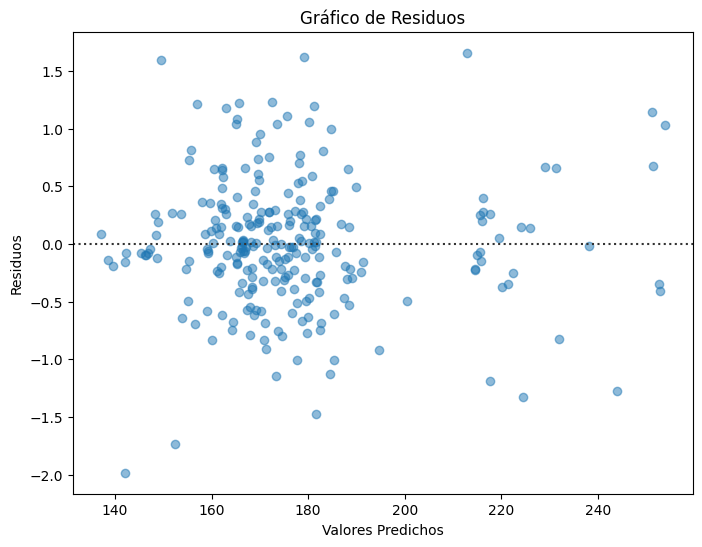

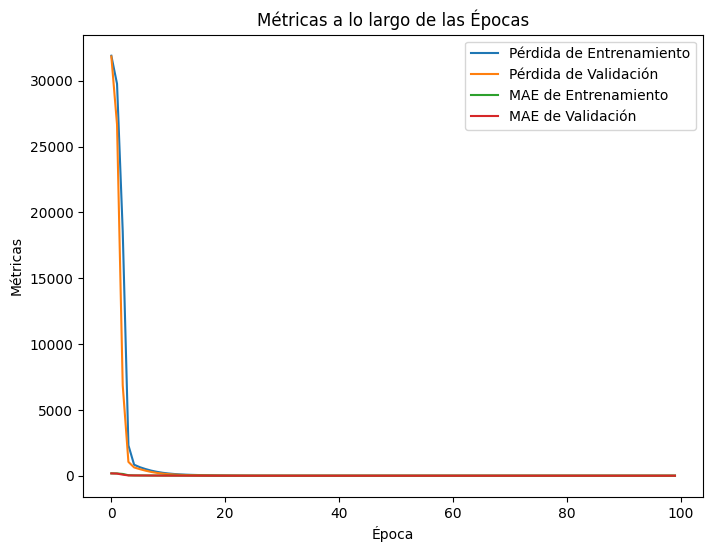

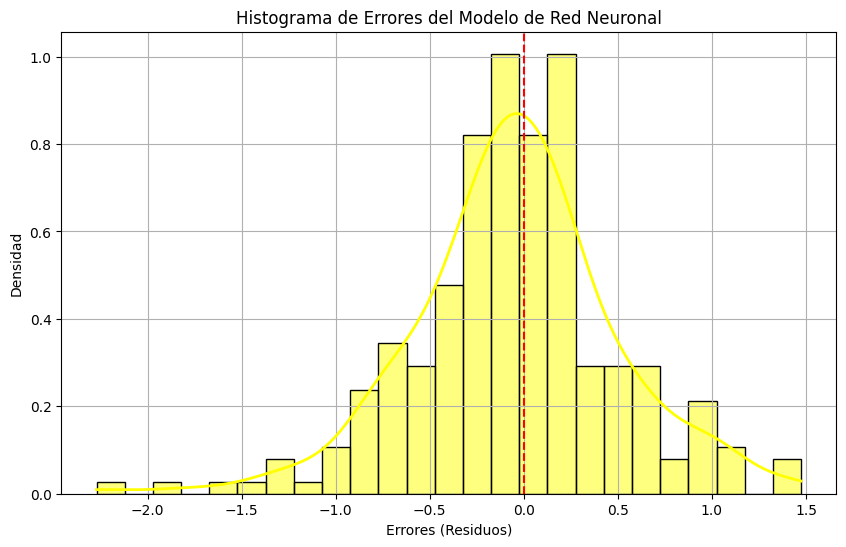

In [97]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Convertir y_pred a 1D array
y_pred = y_pred.flatten()

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calcular accuracy de regresión (umbral = 5)
umbral = 5
accuracy_regresion = np.mean(np.abs(y_test - y_pred) <= umbral)
print(f"Accuracy de regresión (umbral = {umbral}): {accuracy_regresion:.2f}")

# Generar las gráficas

# 1. Valores Reales vs. Predichos
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Predichos")
plt.show()

# 2. Gráfico de residuos
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, scatter_kws={'alpha':0.5})
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.show()

# 3. Métricas a lo largo de las épocas
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.plot(history.history['mae'], label='MAE de Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de Validación')
plt.xlabel("Época")
plt.ylabel("Métricas")
plt.title("Métricas a lo largo de las Épocas")
plt.legend()
plt.show()

# 4. Histograma de errores
plt.figure(figsize=(10, 6))
sns.histplot(errores, bins=25, kde=True, color='yellow', stat='density', line_kws={'color': 'blue', 'linewidth': 2})
plt.title('Histograma de Errores del Modelo de Red Neuronal')
plt.xlabel('Errores (Residuos)')
plt.ylabel('Densidad')
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

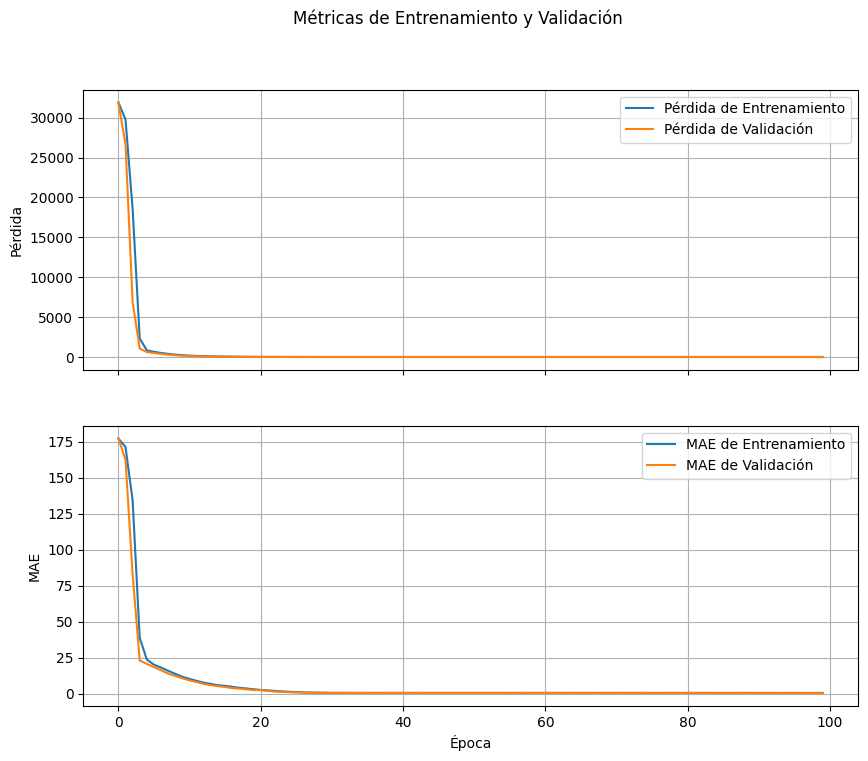

In [98]:
# Graficar las métricas en un solo plot con dos subplots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)  # sharex=True para compartir el eje x

# Subplot 1: Pérdida
ax1.plot(history.history['loss'], label='Pérdida de Entrenamiento')
ax1.plot(history.history['val_loss'], label='Pérdida de Validación')
ax1.set_ylabel('Pérdida')
ax1.legend()
ax1.grid(True)

# Subplot 2: MAE
ax2.plot(history.history['mae'], label='MAE de Entrenamiento')
ax2.plot(history.history['val_mae'], label='MAE de Validación')
ax2.set_xlabel('Época')
ax2.set_ylabel('MAE')
ax2.legend()
ax2.grid(True)

plt.suptitle('Métricas de Entrenamiento y Validación')  # Título general del plot
plt.show()

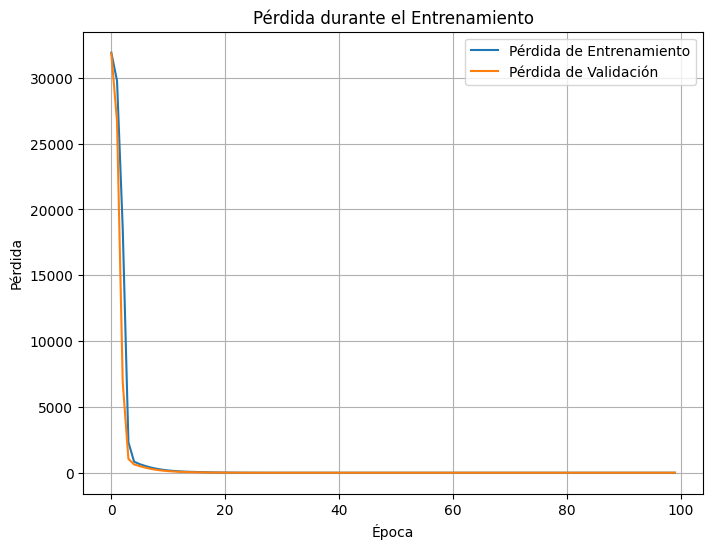

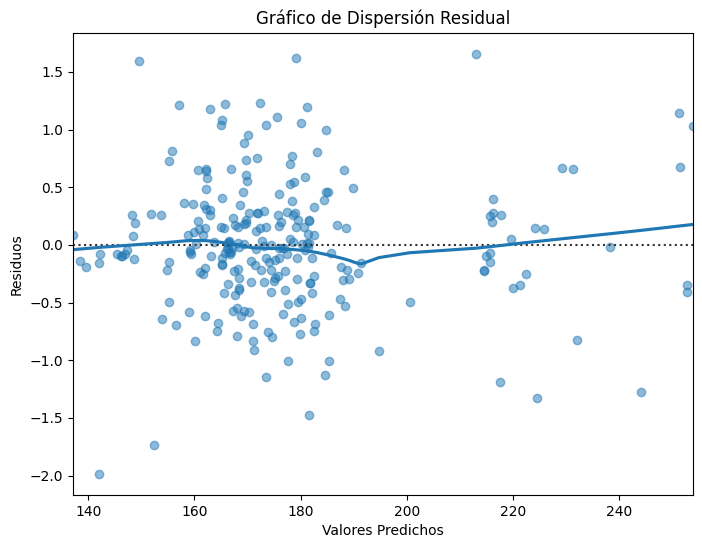

In [100]:
# Calcular los residuos
residuals = y_test - y_pred

# Crear el gráfico de dispersión residual
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})  # lowess=True para la línea de suavizado
plt.title('Gráfico de Dispersión Residual')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()